<a href="https://colab.research.google.com/github/radhakrishnan-omotec/ocr_repo/blob/main/IRIS_week10_Medical_Project_Tesseract_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset 1 - Medical Report of Patient

In [1]:
!git clone https://github.com/radhakrishnan-omotec/ocr_repo.git

Cloning into 'ocr_repo'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 134 (delta 28), reused 0 (delta 0), pack-reused 85
Receiving objects: 100% (134/134), 23.48 MiB | 19.08 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [2]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (9,157 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
!pip install pytesseract

# PART 1 - OCR using Tesseract

In [4]:
import pytesseract
import cv2
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving RedBull3.png to RedBull3.png


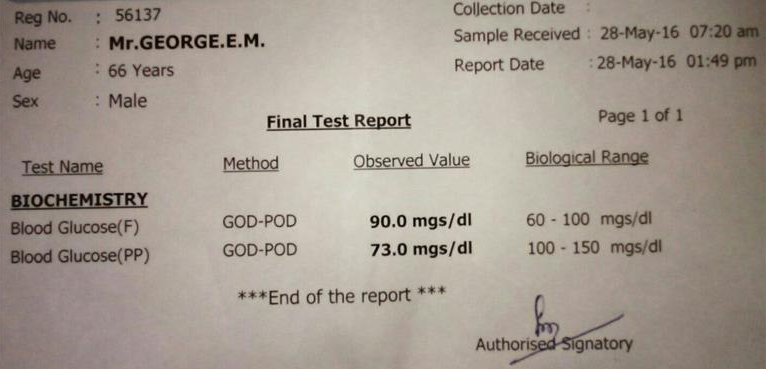

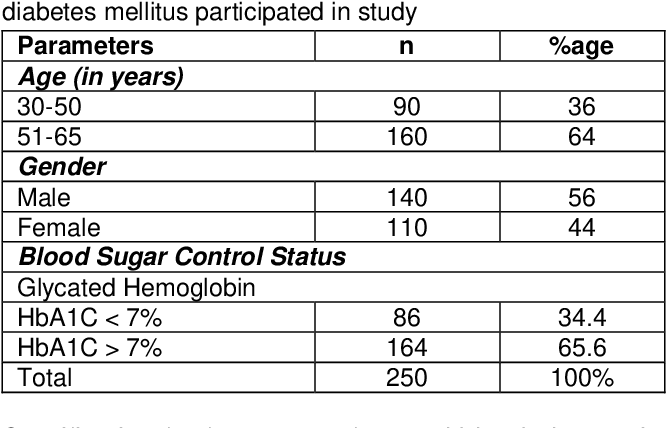

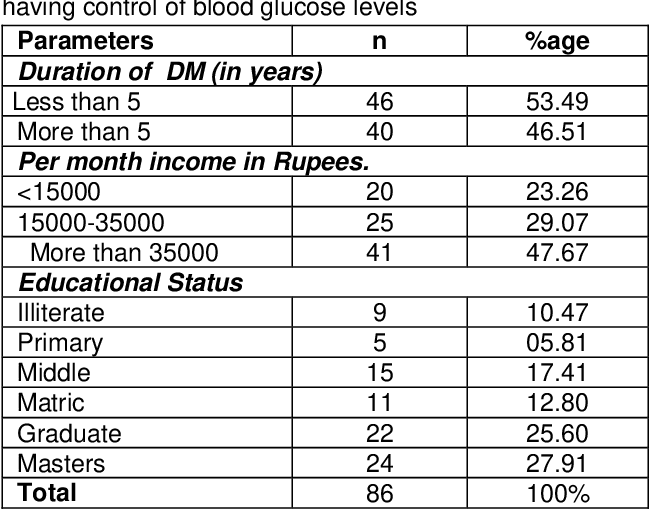

In [5]:
#from google.colab.patches import cv2_imshow

img1 = Image.open('/content/ocr_repo/Report1.png')
display(img1)

img2 = Image.open('/content/ocr_repo/Report2.png')
display(img2)

img3 = Image.open('/content/ocr_repo/Report3.png')
display(img3)



### Preprocessing of images using OpenCV

We will write basic functions for different preprocessing methods
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching.

Different methods can come in handy with different kinds of images.

## PATIENT REPORT IMAGE 1:

In [6]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [7]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[ 89  88  86 ...  73  73  77]
 [ 89  89  86 ...  73  73  75]
 [ 90  90  88 ...  74  74  75]
 ...
 [111 109 110 ...  93  92  99]
 [111 107 106 ...  92  91  96]
 [110 109 109 ...  97  97  97]]
Green =  [[100  97  95 ...  83  83  87]
 [102 100  97 ...  83  83  85]
 [102 100  98 ...  84  84  85]
 ...
 [112 111 112 ... 105 104 108]
 [113 109 108 ... 104 103 105]
 [115 112 112 ... 109 109 106]]
Red =  [[108 106 104 ... 100 100 104]
 [110 108 105 ... 101 100 102]
 [112 110 108 ... 102 101 102]
 ...
 [132 129 130 ... 117 116 121]
 [131 127 126 ... 116 115 118]
 [130 127 127 ... 121 121 119]]


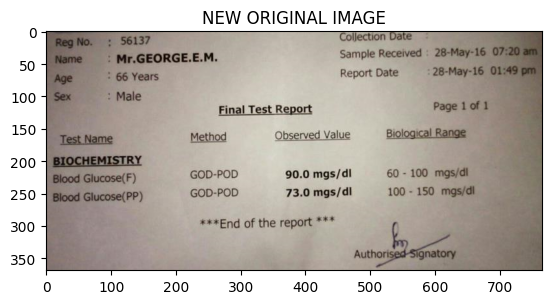

In [8]:
# Plot original image

image = cv2.imread('/content/ocr_repo/Report1.png')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

In [9]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

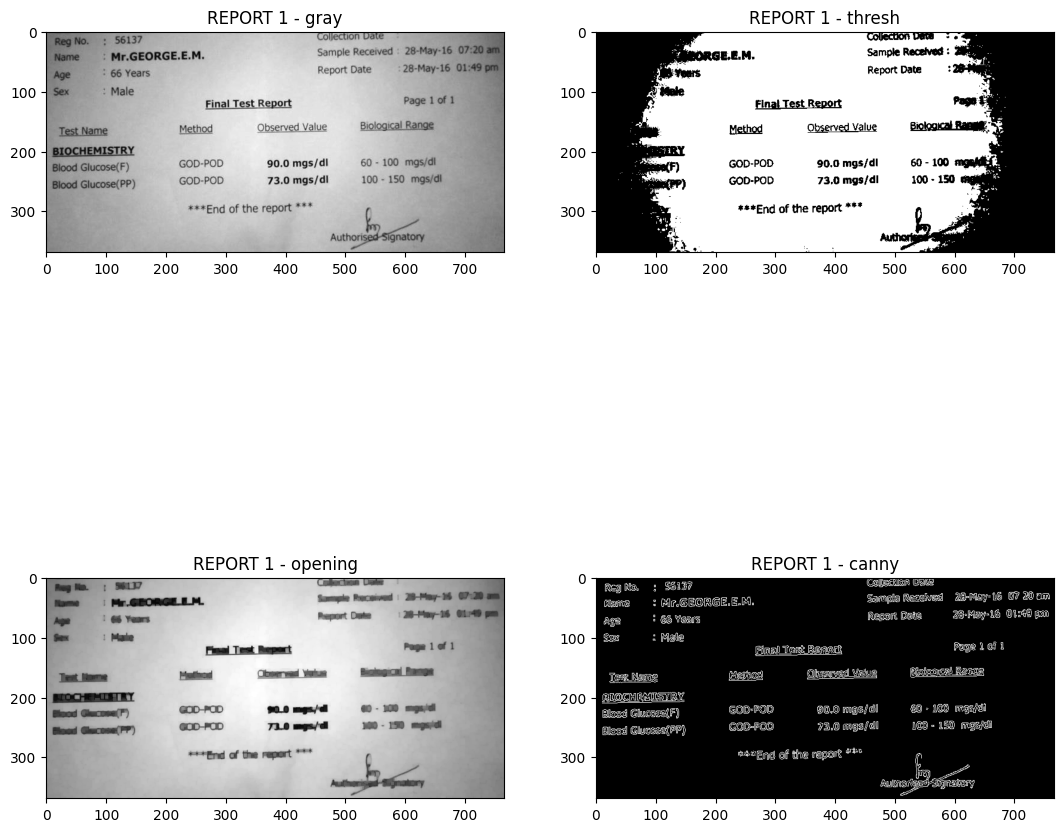

In [10]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REPORT 1 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

### Page Segmentation Modes

There are several ways a page of text can be analysed. The tesseract api provides several page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

Here's a list of the supported page segmentation modes by tesseract -

0    Orientation and script detection (OSD) only.  
1    Automatic page segmentation with OSD.  
2    Automatic page segmentation, but no OSD, or OCR.  
3    Fully automatic page segmentation, but no OSD. (Default)  
4    Assume a single column of text of variable sizes.  
5    Assume a single uniform block of vertically aligned text.  
6    Assume a single uniform block of text.  
7    Treat the image as a single text line.  
8    Treat the image as a single word.  
9    Treat the image as a single word in a circle.  
10    Treat the image as a single character.  
11    Sparse text. Find as much text as possible in no particular order.  
12    Sparse text with OSD.  
13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.  

To change your page segmentation mode, change the ```--psm``` argument in your custom config string to any of the above mentioned mode codes.

In [14]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

###############################
multiline_string=pytesseract.image_to_string(image, config=custom_config)
print('=========================================')
print("MULTI LINE STRING OUTPUT ")
print('=========================================')
print(multiline_string)
###############################

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
P Collection Date =
: Mr.GEORGE.E.M. Sample Received « 4 ay-
"66 Years Report Date +2 “1
: Male a
Final Test Report Page 1 of |
el Method Observed Value ——Biological Range
HEMISTR
slucose(F) GOD-POD 90.0 mgs/dl 60-100 mgs/di
se(PP) GOD-POD 73.0 mgs/dl 100 - 150 bul
ee +**End of the report *** p a


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
P Collection Date =
: Mr.GEORGE.E.M. Sample Received « 4 ay-
"66 Years Report Date +2 “1
: Male a
Final Test Report Page 1 of |
el Method Observed Value ——Biological Range
HEMISTR
slucose(F) GOD-POD 90.0 mgs/dl 60-100 mgs/di
se(PP) GOD-POD 73.0 mgs/dl 100 - 150 bul
ee +**End of the report *** p a


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
P Collection Date =
: Mr.GEORGE.E.M. 

## PATIENT REPORT IMAGE 2:

In [15]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [16]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Green =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Red =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


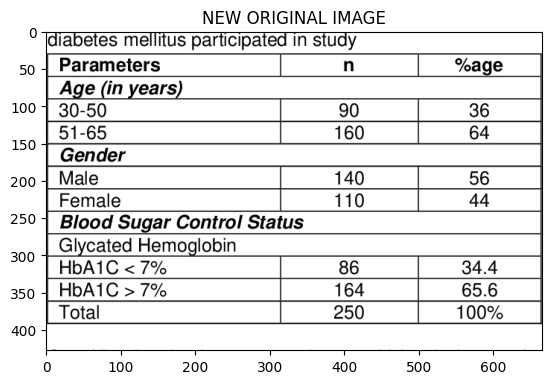

In [17]:
# Plot original image

image = cv2.imread('/content/ocr_repo/Report2.png')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

In [18]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

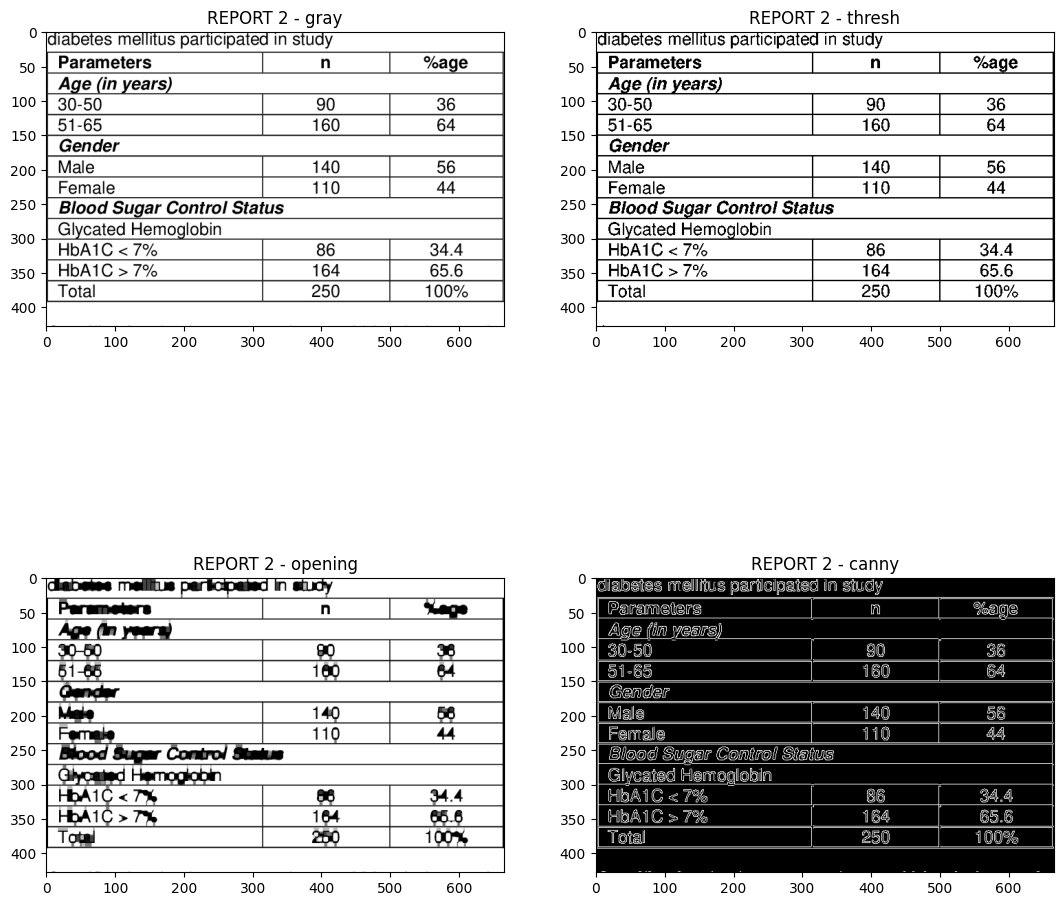

In [20]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REPORT 2 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [22]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

###############################
multiline_string=pytesseract.image_to_string(image, config=custom_config)
print('=========================================')
print("MULTI LINE STRING OUTPUT ")
print('=========================================')
print(multiline_string)
###############################


-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
diabetes mellitus participated in study

[Parameters TT age
[30-50
[e165 Tt
[Female | 1
[HbAIC<7% | 8G 84


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
diabetes mellitus participated in study

[Parameters TT age
[30-50
[e165 Tt
[Female | 1
[HbAIC<7% | 8G 84


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
diabetes mellitus participated in study

[Parameters TT age
[30-50
[e165 Tt
[Female | 1
[HbAIC<7% | 8G 84


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-----------------------------------------
diabetes mellitus participated in study

[Parameters TT age
[30-50
[e165 Tt
[Female | 1
[HbAIC<7% | 8G 84

MULTI LINE STRING OUTPUT 
diabetes mellitus participated in study

[Parameters TT 

## PATIENT REPORT IMAGE 3:

In [23]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [24]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255  67   6 ...  30   8 255]
 [255  92  13 ...  42  17 255]
 [255 255 255 ... 255 255 255]]
Green =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255  67   6 ...  30   8 255]
 [255  92  13 ...  42  17 255]
 [255 255 255 ... 255 255 255]]
Red =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255  67   6 ...  30   8 255]
 [255  92  13 ...  42  17 255]
 [255 255 255 ... 255 255 255]]


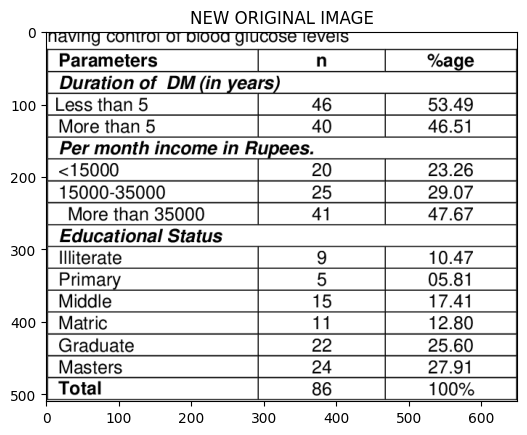

In [25]:

# Plot original image

image = cv2.imread('/content/ocr_repo/Report3.png')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

In [26]:

# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

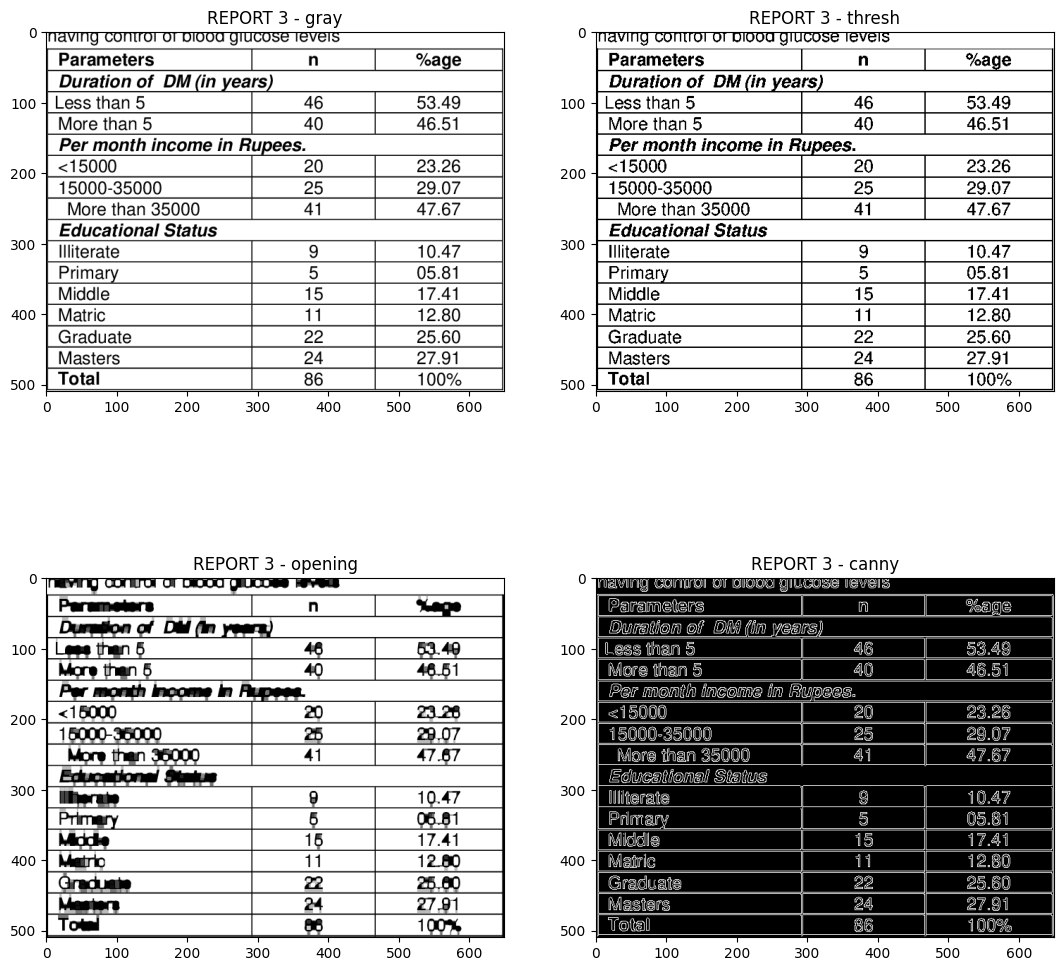

In [27]:

# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REPORT 3 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [28]:

# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

###############################
multiline_string=pytesseract.image_to_string(image, config=custom_config)
print('=========================================')
print("MULTI LINE STRING OUTPUT ")
print('=========================================')
print(multiline_string)
###############################



-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
Naving Control OF DIOOa QIUCOSE levels

[Parameters [on] age
[Lessthan5 | 46 | 5.4
|MorethanS | 40 | TT
[iliterate 107
[Total [| 86 | 100% |


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
Naving Control OF DIOOa QIUCOSE levels

[Parameters [on] age
[Lessthan5 | 46 | 5.4
|MorethanS | 40 | TT
[iliterate 107
[Total [| 86 | 100% |


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
Naving Control OF DIOOa QIUCOSE levels

[Parameters [on] age
[Lessthan5 | 46 | 5.4
|MorethanS | 40 | TT
[iliterate 107
[Total [| 86 | 100% |


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-----------------------------------------
Naving Control OF DIOOa QIUCOSE levels

[Parameters [on] age
[Lessthan5 | 46 | 5.4
|M

<hr><hr>

## Write the pytesseract output to an 'Thresholds for Diabetes Mellitus (per serving)' dictionary

In [46]:
import nltk

# Download NLTK's language detection data (only need to do this once)
nltk.download('words')

# Sample multiline string
multiline_string = """
P Collection Date =
: Mr.GEORGE.E.M. Sample Received « 4 ay-
"66 Years Report Date +2 “1
: Male a
Final Test Report Page 1 of |
el Method Observed Value ——Biological Range
HEMISTR
slucose(F) GOD-POD 90.0 mgs/dl 60-100 mgs/di
se(PP) GOD-POD 73.0 mgs/dl 100 - 150 bul
ee +**End of the report *** p a
"""

# Split the multiline string into lines
lines = multiline_string.splitlines()

# Initialize an empty list to store lines with any English word
output_list = []

# Check if any word in each line is an English word and if it contains "fat"
for line in lines:
    words = line.split()
    if words and (any(word in nltk.corpus.words.words() for word in words) or "slucose" in line.lower()):
        output_list.append(line)

# Convert the output_list to a single string
output_string = ' '.join(output_list)

# Store the output in a dictionary with the key "Ingredients List"
energy_drink_data = {"Thresholds for Diabetes Mellitus (per serving)": output_string}

# Print the energy_drink_data dictionary
print("========================")
print(energy_drink_data)
print("========================")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


{'Thresholds for Diabetes Mellitus (per serving)': 'P Collection Date = : Male a Final Test Report Page 1 of | el Method Observed Value ——Biological Range slucose(F) GOD-POD 90.0 mgs/dl 60-100 mgs/di ee +**End of the report *** p a'}
